#### Using new categorized salary data of selected companies.
#### edited on 11.16
#### edited on 11.17: add new analysis
#### edited on 11.18: revise figures and save to files. Fixed bugs in internship salary analysis (yearly/hourly salary)
#### edited on 11.20: fixed bugs

## 1.1 What kind of jobs can get the highest salary in the current days?
#### salary range for categories

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns
from scipy import stats
import sys
import matplotlib as mpl

In [143]:
data = pd.read_csv('./Scraper/SalaryScraper/fulltime_merged_salaries_company_table.csv')

In [144]:
groups = data.groupby('category')
eng = groups.get_group('engineering')
it = groups.get_group('it')
managerial = groups.get_group('managerial')
marketing = groups.get_group('marketing')
others = groups.get_group('others')
sales = groups.get_group('sales')

In [145]:
def salary_of_category(d):
    '''
    for all non-0 input
    return range of this category
    '''
    salary = d[d.salary_range.notnull()]['salary_range']
    s = salary.str.replace('K', '').str.replace('$', '').str.replace('€', '').str.replace('£', '').str.replace("Range: ", '')
    s = s.apply(lambda x: pd.Series(x.split(' - '))) 
    s = s.astype('int')
    return s

In [146]:
# Data frame of low / high salary
ave_eng = (salary_of_category(eng))
ave_it  = (salary_of_category(it))
ave_managerial  = (salary_of_category(managerial))
ave_marketing  = (salary_of_category(marketing))
ave_others  = (salary_of_category(others))
ave_sales  = (salary_of_category(sales))

In [147]:
# low / high average
salary_eng = ave_eng.sum()/len(ave_eng)
salary_it  = ave_it.sum()/len(ave_it)
salary_mana  = ave_managerial.sum()/len(ave_managerial)
salary_mk  = ave_marketing.sum()/len(ave_marketing)
salary_others = ave_others.sum()/len(ave_others)
salary_sales = ave_sales.sum()/len(ave_sales)

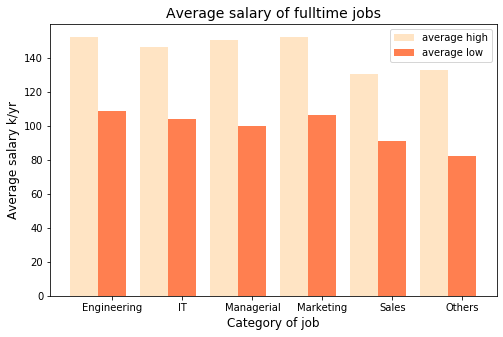

In [148]:
# plot graph
fig, ax = plt.subplots(figsize=(8, 5))
name_list = ['Engineering','IT','Managerial','Marketing', 'Sales', 'Others']
num_list2 = [salary_eng[0],salary_it[0],salary_mana[0],salary_mk[0],salary_others[0],salary_sales[0]]
num_list1 = [salary_eng[1],salary_it[1],salary_mana[1],salary_mk[1],salary_others[1],salary_sales[1]]
x =list(range(len(num_list1)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average high', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average low', tick_label = name_list, color = 'coral')
ax.set_xlabel('Category of job', fontsize=12)
ax.set_ylabel('Average salary k/yr', fontsize=12)
plt.legend(fontsize = 10)
ax.tick_params(labelsize = 10)
plt.title('Average salary of fulltime jobs',fontsize=14)
plt.show()
fig.savefig('./graphs/a1_q1.png', format='png', dpi=300)

In [149]:
def bar_group(file_name, x, y, title, size, classes, values, width=0.8):
    fig, ax = plt.subplots(figsize=size)
    plt.xlabel(x, fontsize = 12)
    plt.ylabel(y, fontsize = 12)
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, rotation=20, size=13)
    plt.title(title,fontsize=14)
    plt.legend(['Average high salary', 'Average low salary'], fontsize = 9)
    fig.savefig(file_name, format='png', dpi=300)

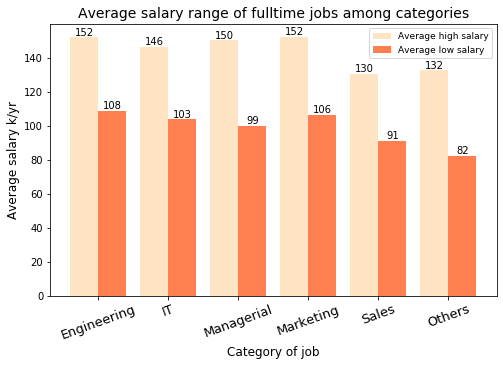

In [150]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["bisque", "coral"])
group = ['Engineering','IT','Managerial','Marketing', 'Sales', 'Others']
bar_group('./graphs/a1_q1_2.png', 'Category of job', 'Average salary k/yr','Average salary range of fulltime jobs among categories',(8,5), group, [num_list1, num_list2])
plt.show()


### 1.2 The distribution of salary in each category

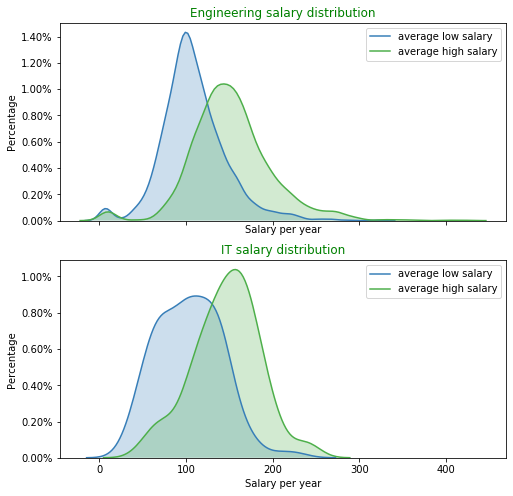

In [151]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_eng[0], label = 'average low salary', shade=True, color=c2, ax=ax1).set_title('Engineering salary distribution', fontsize = 12, color = 'Green')
ax1.set_xlabel('Salary per year', fontsize=10)
ax1.set_ylabel('Percentage', fontsize=10)
vals1 = ax1.get_yticks()
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])

sns.kdeplot(ave_eng[1], label = 'average high salary',shade=True, color=c3, ax=ax1)
sns.kdeplot(ave_it[0], label = 'average low salary', shade=True, color=c2, ax=ax2).set_title('IT salary distribution', fontsize = 12, color = 'Green')
ax2.set_xlabel('Salary per year', fontsize=10)
ax2.set_ylabel('Percentage', fontsize=10)
vals2 = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])
sns.kdeplot(ave_it[1], label = 'average high salary',shade=True, color=c3, ax=ax2)
f.savefig('./graphs/a2_q1.png', format='png', dpi=300)

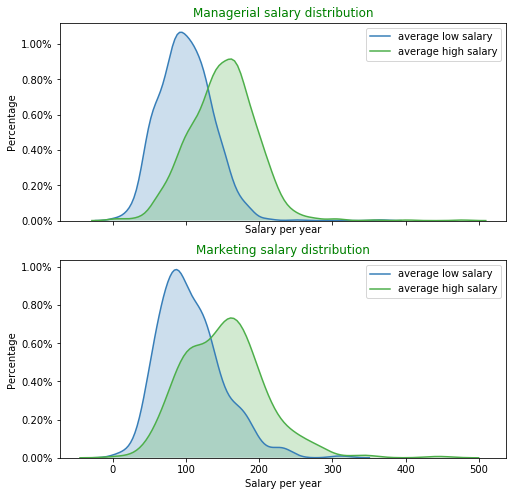

In [152]:
f, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_managerial[0], label = 'average low salary', shade=True, color=c2, ax=ax3).set_title('Managerial salary distribution', fontsize=12, color = 'Green')
ax3.set_xlabel('Salary per year', fontsize=10)
ax3.set_ylabel('Percentage', fontsize=10)
vals3 = ax3.get_yticks()
ax3.set_yticklabels(['{:,.2%}'.format(x) for x in vals3])

sns.kdeplot(ave_managerial[1], label = 'average high salary',shade=True, color=c3, ax=ax3)
sns.kdeplot(ave_marketing[0], label = 'average low salary', shade=True, color=c2, ax=ax4).set_title('Marketing salary distribution', fontsize=12, color = 'Green')
sns.kdeplot(ave_marketing[1], label = 'average high salary',shade=True, color=c3, ax=ax4)
ax4.set_xlabel('Salary per year', fontsize=10)
ax4.set_ylabel('Percentage', fontsize=10)
vals4 = ax4.get_yticks()
ax4.set_yticklabels(['{:,.2%}'.format(x) for x in vals4])
f.savefig('./graphs/a3_q1.png', format='png', dpi=300)

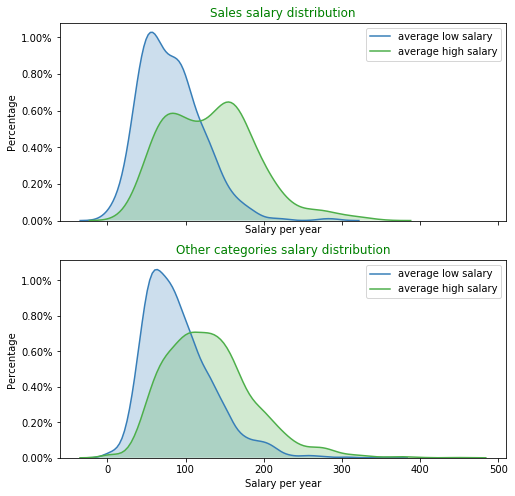

In [153]:
f, (ax5, ax6) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_sales[0], label = 'average low salary', shade=True, color=c2, ax=ax5).set_title('Sales salary distribution', fontsize=12, color = 'Green')
ax5.set_xlabel('Salary per year', fontsize=10)
ax5.set_ylabel('Percentage', fontsize=10)
vals5 = ax5.get_yticks()
ax5.set_yticklabels(['{:,.2%}'.format(x) for x in vals5])

sns.kdeplot(ave_sales[1], label = 'average high salary',shade=True, color=c3, ax=ax5)
sns.kdeplot(ave_others[0], label = 'average low salary', shade=True, color=c2, ax=ax6).set_title('Other categories salary distribution', fontsize=12, color = 'Green')
ax6.set_xlabel('Salary per year', fontsize=10)
ax6.set_ylabel('Percentage', fontsize=10)
vals6 = ax6.get_yticks()
ax6.set_yticklabels(['{:,.2%}'.format(x) for x in vals6])
sns.kdeplot(ave_others[1], label = 'average high salary',shade=True, color=c3, ax=ax6)
f.savefig('./graphs/a4_q1.png', format='png', dpi=300)

### 1.3 What kind of interns get paid more?

In [154]:
data_int = pd.read_csv('./Scraper/SalaryScraper/intern_merged_salaries_company_table.csv')

In [155]:
data_int

,job_title,mean_pay,salary_range,company,category
0,Software Engineer - Hourly Intern,$28/hr,Range: $13 - $42,cisco,engineering
1,Software Engineer() - Hourly Intern,$29/hr,Range: $21 - $43,cisco,engineering
2,Intern - Hourly,$26/hr,Range: $13 - $45,cisco,others
3,Intern - Hourly,$24/hr,Range: $11 - $43,cisco,others
4,IT Engineer - Hourly Intern,$27/hr,Range: $24 - $30,cisco,it
...,...,...,...,...,...
1478,Team Lead - Hourly,$21/hr,Range: $18 - $34,google,others
1479,Receptionist - Hourly,$22/hr,Range: $18 - $23,google,others
1480,Software - Intern,"$86,340/yr",Range: $86K - $87K,google,engineering
1481,Attorney - Hourly Contractor,$50/hr,Range: $48 - $50,google,others


In [156]:
groups2 = data_int.groupby('category')
eng2 = groups2.get_group('engineering')
it2 = groups2.get_group('it')
managerial2 = groups2.get_group('managerial')
marketing2 = groups2.get_group('marketing')
others2 = groups2.get_group('others')
sales2 = groups2.get_group('sales')

In [157]:
# Data frame of low / high salary
ave_eng2 = (salary_of_category(eng2))
ave_it2  = (salary_of_category(it2))
ave_managerial2  = (salary_of_category(managerial2))
ave_marketing2  = (salary_of_category(marketing2))
ave_others2  = (salary_of_category(others2))
ave_sales2  = (salary_of_category(sales2))
# low / high average
salary_eng2 = ave_eng2.sum()/len(ave_eng2)
salary_it2  = ave_it2.sum()/len(ave_it2)
salary_mana2  = ave_managerial2.sum()/len(ave_managerial2)
salary_mk2  = ave_marketing2.sum()/len(ave_marketing2)
salary_others2 = ave_others2.sum()/len(ave_others2)
salary_sales2 = ave_sales2.sum()/len(ave_sales2)

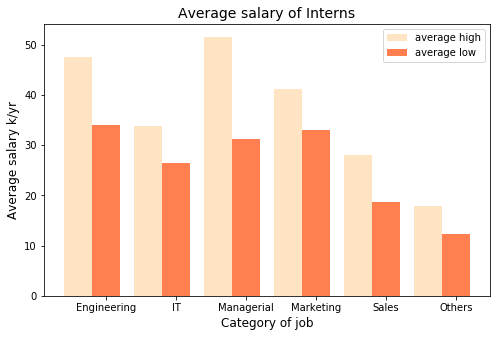

In [158]:
# plot graph
fig, ax = plt.subplots(figsize=(8, 5))
name_list = ['Engineering','IT','Managerial','Marketing', 'Sales', 'Others']
num_list2 = [salary_eng2[0],salary_it2[0],salary_mana2[0],salary_mk2[0],salary_others2[0],salary_sales2[0]]
num_list1 = [salary_eng2[1],salary_it2[1],salary_mana2[1],salary_mk2[1],salary_others2[1],salary_sales2[1]]
x =list(range(len(num_list1)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average high', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average low', tick_label = name_list, color = 'coral')
ax.set_xlabel('Category of job', fontsize=12)
ax.set_ylabel('Average salary k/yr', fontsize=12)
plt.legend(fontsize=10)
ax.tick_params(labelsize = 10)
plt.title('Average salary of Interns',fontsize=14)
plt.show()
fig.savefig('./graphs/a5_q1.png', format='png', dpi=300)

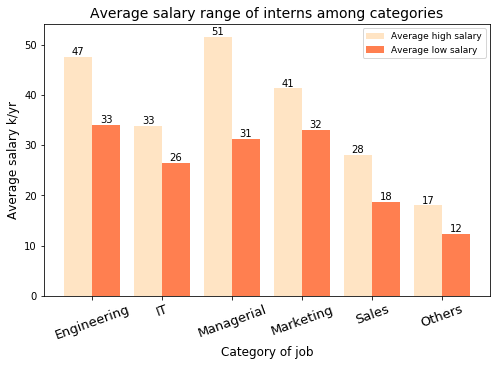

In [159]:
bar_group('./graphs/a5_q1_2.png', 'Category of job', 'Average salary k/yr','Average salary range of interns among categories',(8,5), group, [num_list1, num_list2])
plt.show()

## 2. Which company pays more?
### 2.1 Fulltime jobs. 

In [160]:
groups_company = data.groupby('company')
company_names = (list(groups_company.groups.keys()))
num_companies = len(company_names)

In [161]:
def salary_of_company(d):
    '''
    for all non-0 input
    return range of a certain company
    '''
    salary = d[d.salary_range.notnull()]['salary_range']
    s = salary.str.replace('K', '').str.replace('$', '').str.replace('€', '').str.replace('£', '').str.replace("Range: ", '')
    s = s.apply(lambda x: pd.Series(x.split(' - '))) 
    s = s.astype('int')
    ave = s.sum()/len(s)
    return s, ave

In [162]:
average = []
salary_of_companies = []
for i in range (num_companies):
    company = company_names[i]
    com = groups_company.get_group(company)
    s, ave = salary_of_company(com)
    salary_of_companies.append(s)
    average.append(ave)

In [163]:
outcome = zip(company_names, salary_of_companies, average)

outcome = (list(outcome))

outcome = sorted(outcome, key = lambda x: x[2][1], reverse = True)

In [164]:
name_list = []
num_list1 = []
num_list2 = []
for j in range (num_companies):
    name_list.append(outcome[j][0])
    num_list2.append(outcome[j][2][0])
    num_list1.append(outcome[j][2][1])

In [165]:
name_list = [c.title() for c in name_list]
name_list = [c.upper() if c == "Ibm" or c == "Hp" else c for c in name_list]

In [166]:
def bar_group_2(file_name, x, y, title, size, classes, values, width=0.8):
    fig, ax = plt.subplots(figsize=size)
    plt.xlabel(x, fontsize = 20)
    plt.ylabel(y, fontsize = 20)
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, rotation=25, size=15)
    plt.title(title,fontsize=35)
    plt.legend(['Average high salary', 'Average low salary'], fontsize = 15)
    fig.savefig(file_name, format='png', dpi=300)

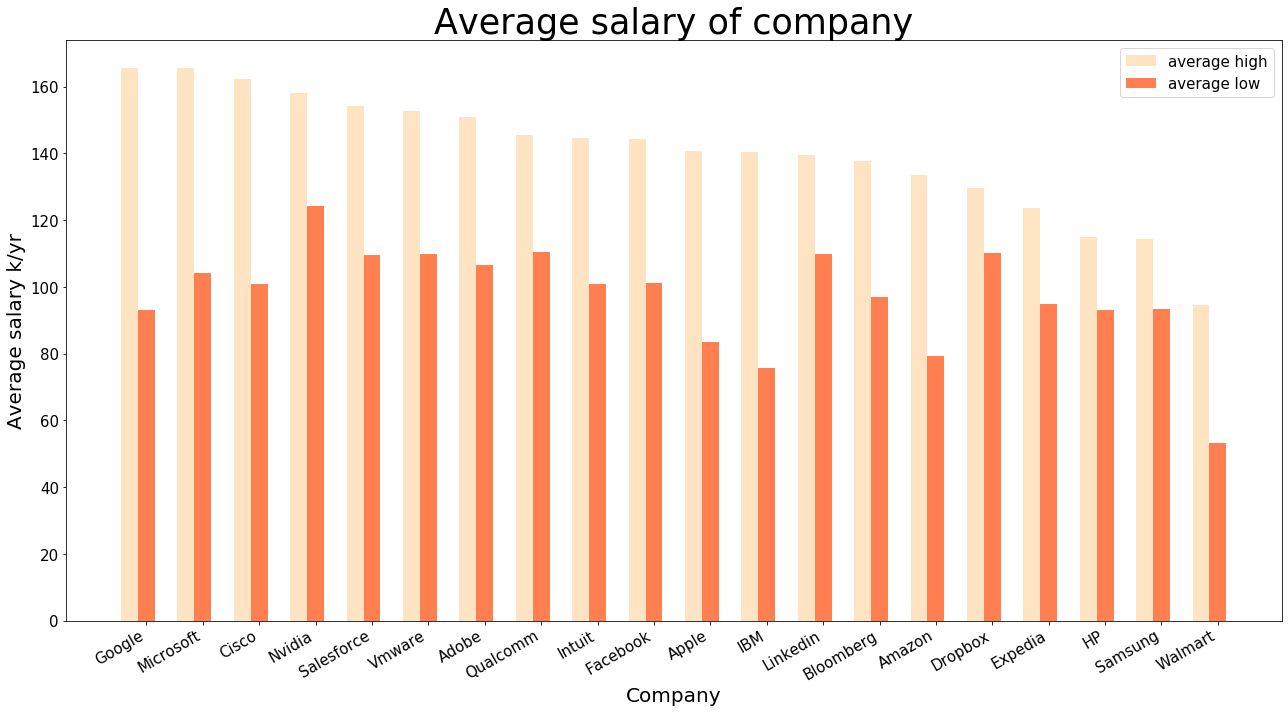

In [167]:
# plot graph
fig, ax = plt.subplots(figsize=(18, 10))
x =list(range(len(num_list1)))
total_width, n = 0.6, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average high', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average low', tick_label = name_list, color = 'coral')
plt.legend(fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Average salary k/yr', fontsize=20)
plt.title('Average salary of company',fontsize=35)
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.tight_layout()
plt.show()
fig.savefig('./graphs/a1_q7.png', format='png', dpi=300)

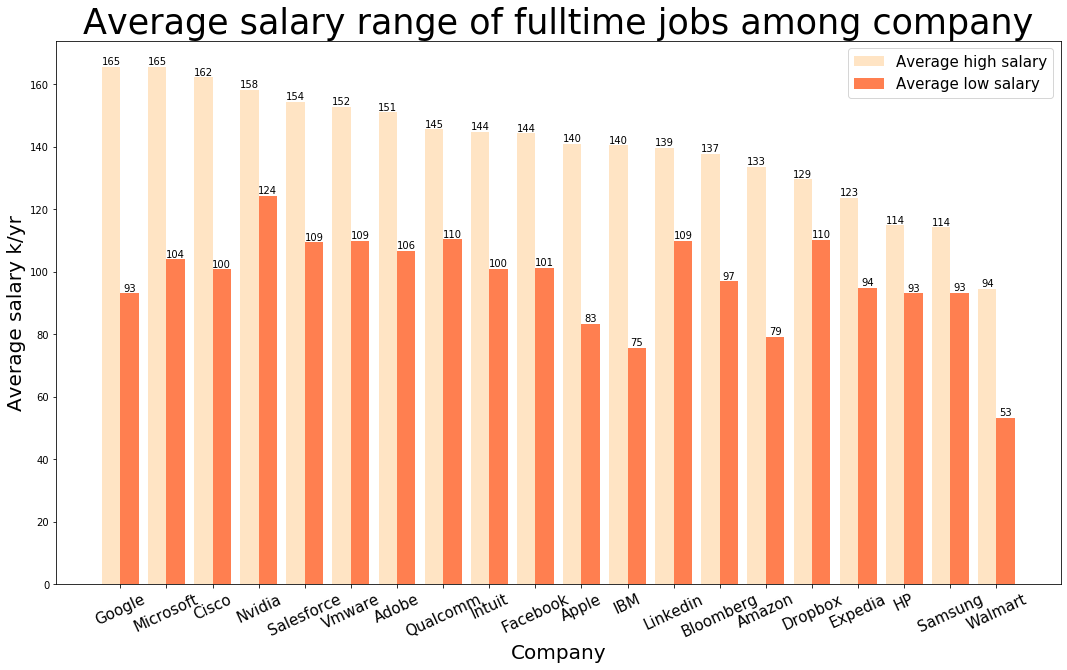

In [168]:
bar_group_2('./graphs/a1_q7_2.png', 'Company', 'Average salary k/yr','Average salary range of fulltime jobs among company',(18,10), name_list, [num_list1, num_list2])
plt.show()

### 2.2 Which company pays more to intern jobs?

In [169]:
groups_company_int = data_int.groupby('company')
company_names_int = (list(groups_company_int.groups.keys()))
num_companies_int = len(company_names_int)

In [170]:
def salary_of_company_int(d):
    '''
    for all non-0 input
    return range of a certain company
    distinguish hourly and yearly income
    '''
    salary = d[d.salary_range.notnull()]['salary_range']
    s = salary.str.replace('$', '').str.replace('€', '').str.replace('£', '').str.replace("Range: ", '').str.replace(" ", '').str.replace(" ", '')
    for j in s.index:
        line = s[j]
        i = line.split('-')
        if "K" in i[0]:
            i[0]=i[0].replace('K', '')
            i[0]=str(int(i[0])*1000/365/8)
            i[1]=i[1].replace('K', '')
            i[1]=str(int(i[1])*1000/365/8)
            ii = "-".join(i)
        ii = "-".join(i)
        s[j] = ii
    s = s.apply(lambda x: pd.Series(x.split('-'))) 
    s = s.astype('float')
    ave = s.sum()/len(s)
    return s, ave
    

In [171]:
average_int = []
salary_of_companies_int = []
for i in range (num_companies_int):
    company = company_names_int[i]
    com = groups_company_int.get_group(company)
    s, ave = salary_of_company_int(com)
    salary_of_companies_int.append(s)
    average_int.append(ave)

In [172]:
outcome1 = zip(company_names_int, salary_of_companies_int, average_int)

outcome1 = (list(outcome1))

outcome1 = sorted(outcome1, key = lambda x: x[2][1], reverse = True)
name_list_int = []
num_list1 = []
num_list2 = []
for j in range (num_companies_int):
    name_list_int.append(outcome1[j][0])
    num_list2.append(outcome1[j][2][0])
    num_list1.append(outcome1[j][2][1])

In [173]:
name_list_int = [c.title() for c in name_list_int]
name_list_int = [c.upper() if c == "Ibm" or c == "Hp" else c for c in name_list_int]

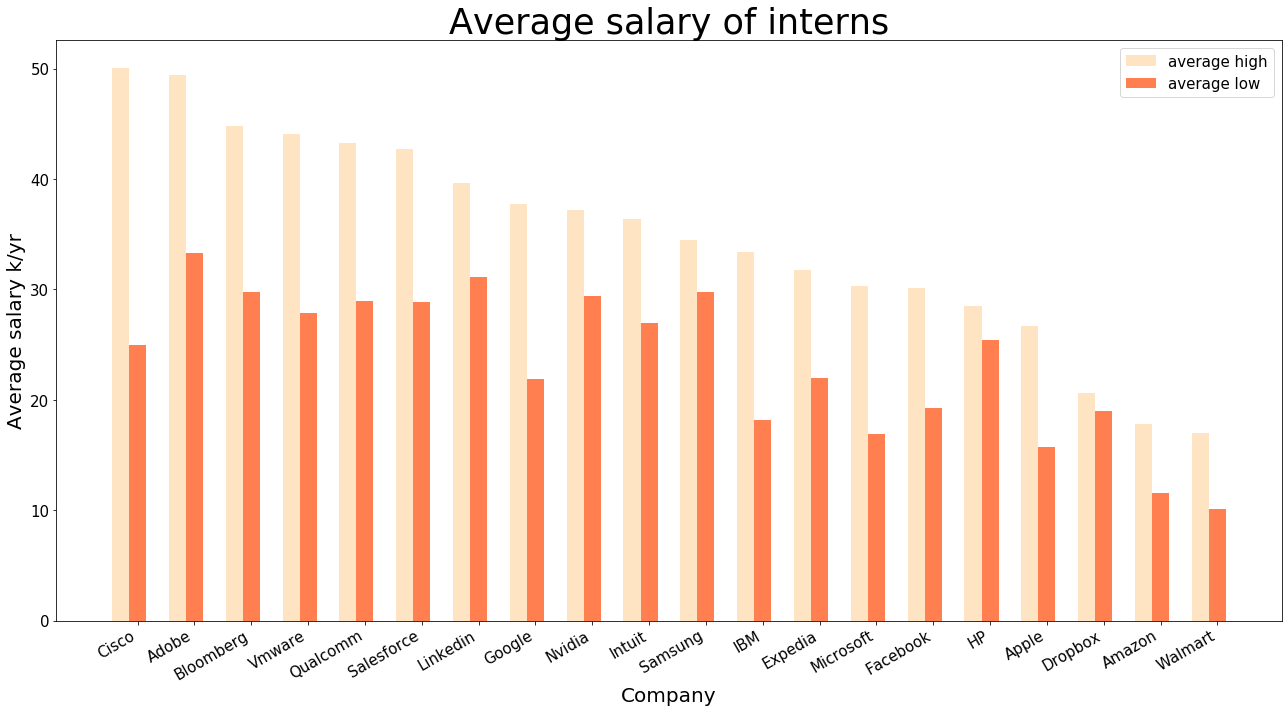

In [174]:
# plot graph
fig, ax = plt.subplots(figsize=(18, 10))
x =list(range(len(num_list1)))
total_width, n = 0.6, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average high', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average low', tick_label = name_list_int, color = 'coral')
plt.legend(fontsize = 15)
ax.tick_params(labelsize = 15)
plt.title('Average salary of interns of companies',fontsize='large')
ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Average salary k/yr', fontsize=20)
plt.title('Average salary of interns',fontsize=35)
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.tight_layout()
plt.show()
fig.savefig('./graphs/a2_q7.png', format='png', dpi=300)

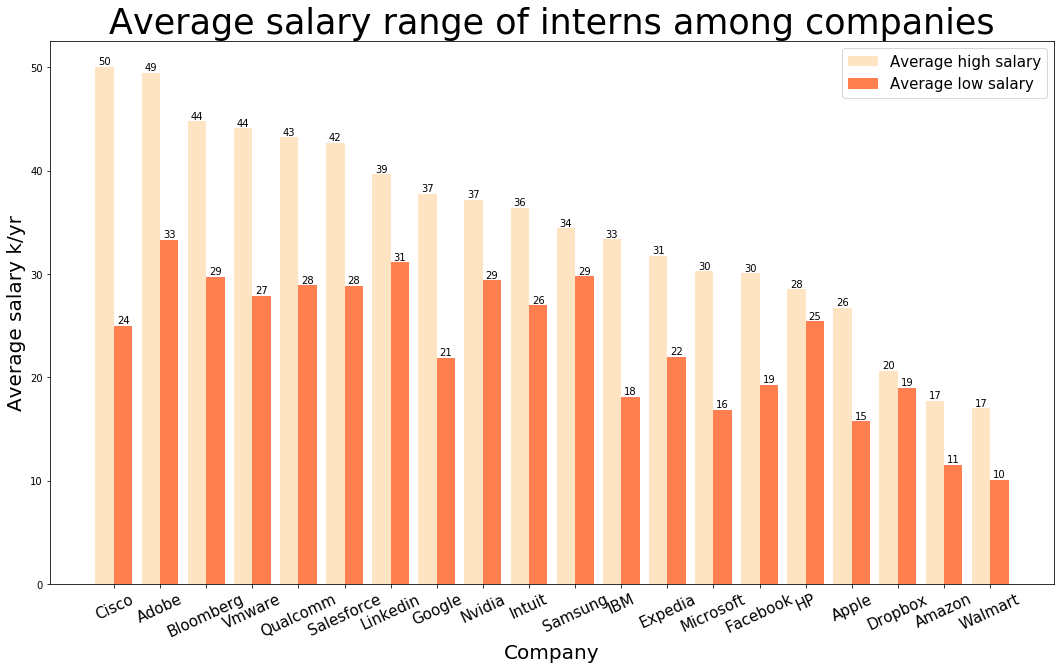

In [175]:
bar_group_2('./graphs/a2_q7_2.png', 'Company', 'Average salary k/yr','Average salary range of interns among companies',(18,10), name_list_int, [num_list1, num_list2])
plt.show()

## 2. What is the distribution of job opportunities among different categories?

In [176]:
len(eng.groupby('job_title').groups)

1063

In [177]:
def num_of_jobs(data):
    names = []
    num = []
    for category in data.groupby('category').groups:
        n = data.groupby('category').get_group(category)
        names.append(category)
        num.append(len(n.groupby('job_title').groups))
    outcome = zip(names, num)
    outcome = (list(outcome))
    outcome = sorted(outcome, key = lambda x: x[1], reverse = True)
    lengths = pd.DataFrame(data = outcome, columns = ['category','number'])
    return lengths

In [178]:
numbers = num_of_jobs(data)

In [179]:
numbers

,category,number
0,others,1347
1,engineering,1063
2,managerial,538
3,sales,151
4,marketing,140
5,it,80


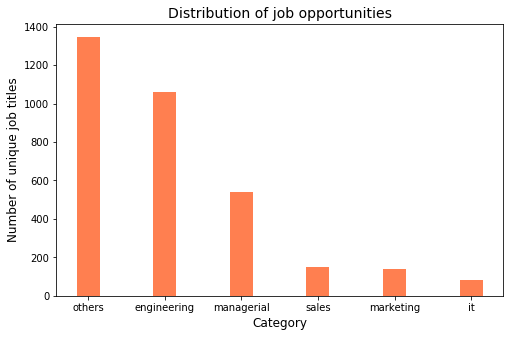

In [180]:
# plot graph
fig, ax = plt.subplots(figsize=(8,5))
x =list(range(len(numbers)))
total_width, n = 0.6, 2
width = total_width / n
plt.bar(x, numbers['number'], width=width, tick_label = numbers['category'],  color = 'coral')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Number of unique job titles', fontsize=12)
plt.title('Distribution of job opportunities',fontsize=14)
plt.show()
fig.savefig('./graphs/a1_q3.png', format='png', dpi=300)

In [181]:
def bar_group_3(file_name, x, y, title, size, classes, values, width=0.4):
    fig, ax = plt.subplots(figsize=size)
    plt.xlabel(x, fontsize = 12)
    plt.ylabel(y, fontsize = 12)
    total_data = len(values)
    classes_num = np.arange(len(classes))
    for i in range(total_data):
        bars = plt.bar(classes_num - width / 2. + i / total_data * width, values[i], 
                width=width / total_data, align="edge", animated=0.4)
        for rect in bars:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks(classes_num, classes, rotation=20, size=13)
    plt.title(title,fontsize=14)
    #plt.legend(['Average high', 'Average low'], fontsize = 9)
    fig.savefig(file_name, format='png', dpi=300)

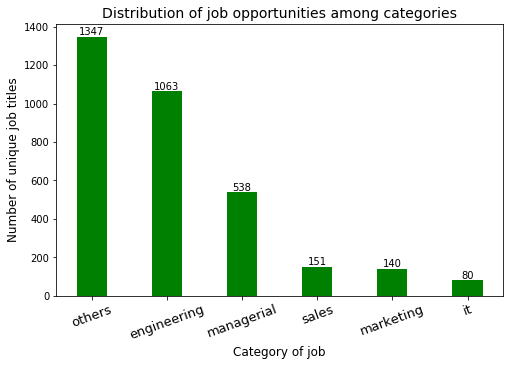

In [182]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["green", "coral"])
bar_group_3('./graphs/a1_q3_2.png','Category of job', 'Number of unique job titles', 'Distribution of job opportunities among categories',(8, 5), numbers['category'], [numbers['number']])
plt.show()